CARTOONIFYING AN IMAGE 

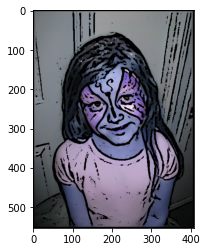

True

In [ ]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
#IMPORTING LIBRARIES

def median_blur(img, ksize):    #APPLYING MEDIAN BLUR ON AN IMAGE OF DEFINED FILTER SIZE
    filtered_img = np.zeros(img.shape, dtype=np.float32)

    for i in range(ksize // 2, img.shape[0] - ksize // 2):
        for j in range(ksize // 2, img.shape[1] - ksize // 2):
            i_min = i - ksize // 2
            i_max = i + ksize // 2 + 1
            j_min = j - ksize // 2
            j_max = j + ksize // 2 + 1
            window = img[i_min:i_max, j_min:j_max]
            median = np.median(window)
            filtered_img[i, j] = median

    return filtered_img.astype(np.uint8)

# Check if the image file exists
if not os.path.exists('/content/face.jpg'):
  print('Image file not found')
  sys.exit()

image = cv2.imread('/content/face.jpg')

# Apply bilateral filter to preserve edges while smoothing the image
color = cv2.bilateralFilter(image, 9, 9, 7)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur to remove noise and smooth the image
blur = median_blur(gray, 7)

# Apply adaptive thresholding to the blurred image

edges = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)


# Convert the thresholded image to color
frame_edge = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Apply bitwise AND operation to the color image and the thresholded image
cartoon = cv2.bitwise_and(np.uint8(color), frame_edge)

# Display the resulting image
plt.imshow(cartoon)
plt.show()

# Save the cartoonized image
cv2.imwrite('screenshot.png', cartoon)



In [ ]:
#APPENDIX for bilateral filter if we wish to hardcode it instead of using the library function
def gaussian(x,sigma):
    return (1.0/(2*np.pi*(sigma**2)))*np.exp(-(x**2)/(2*(sigma**2)))

def distance(x1,y1,x2,y2):
    return np.sqrt(np.abs((x1-x2)**2-(y1-y2)**2))


def bilateral_filter(image, diameter, sigma_i, sigma_s):
    new_image = np.zeros(image.shape)

    for row in range(len(image)):     #MANUALLY CODING THE FORMULA FOR BILATERAL FILTER FOR EACH ROW AND COLUMN ELEMENT
        for col in range(len(image[0])):
            wp_total = 0
            filtered_image = 0
            for k in range(diameter):
                for l in range(diameter):
                    n_x =row - (diameter/2 - k)
                    n_y =col - (diameter/2 - l)
                    if n_x >= len(image):
                        n_x -= len(image)
                    if n_y >= len(image[0]):
                        n_y -= len(image[0])
                    gi = gaussian(image[int(n_x)][int(n_y)] - image[row][col], sigma_i)
                    gs = gaussian(distance(n_x, n_y, row, col), sigma_s)
                    wp = gi * gs
                    filtered_image = (filtered_image) + (image[int(n_x)][int(n_y)] * wp)
                    wp_total = wp_total + wp
            filtered_image = filtered_image // wp_total   
            new_image[row][col] = int(np.round(filtered_image))
    return new_image
image=cv2.imread('/content/face.jpg',0)
plt.imshow(bilateral_filter(image,7,20,20))

In [ ]:
VIDEO PROCESSING

In [ ]:
#CODE FOR APPLYING CARTOONIFICATION FILTERS FOR EACH FRAME
import cv2
from google.colab.patches import cv2_imshow
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
webcam = cv2.VideoCapture('/content/trial.mp4')


i=0
while(webcam.isOpened()):
    ret, frame = webcam.read()    #READING EACH FRAME INFORMATION
    if ret == False:
        break
    color = cv2.bilateralFilter(frame, 9, 9, 7) #APPLYING COLORING FILTERS AND MEDIAN BLUR 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 7)
    edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
    frame_edge = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)  #CREATING EDGES THAT SEEM LIKE SKETCHES
    cartoon = cv2.bitwise_and(color, frame_edge)
    cv2.imwrite('dolphin'+str(i)+'.jpg',cartoon)    #STORING EACH CARTOONIFIED FRAME TO BE COMPILED INTO A VIDEO
    i+=1

webcam.release()
cv2.destroyAllWindows()


In [ ]:
#CODE FOR COMPILING FRAMES INTO A VIDEO FILE
import cv2
import numpy as np
import os
from os.path import isfile, join
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        size = (1080,1920)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()
def main():
    pathIn= '/content/'
    pathOut = 'video.mp4'
    fps = 25.0
    convert_frames_to_video(pathIn, pathOut, fps)
if __name__=="__main__":
    main()

/content/dolphin9.jpg
/content/dolphin8.jpg
/content/dolphin5.jpg
/content/dolphin1.jpg
/content/dolphin2.jpg
/content/dolphin7.jpg
/content/dolphin4.jpg
/content/dolphin6.jpg
/content/dolphin0.jpg
/content/dolphin3.jpg
/content/trial.mp4
